<a href="https://colab.research.google.com/github/ezorigo/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

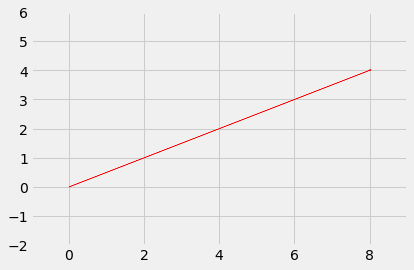

In [42]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

plt.arrow(0,0, 8, 4,head_width=.05, head_length=0.05, color ='red')
plt.xlim(-1,9)          
plt.ylim(-2,6)
plt.show()

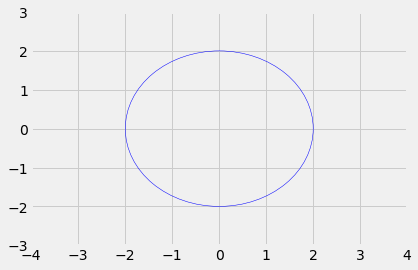

In [43]:
circle = plt.Circle((0, 0), 2, color='b', fill=False)

ax = plt.gca()
ax.cla() # clear things for fresh plot

# change default range so that new circles will work
ax.set_xlim((-4, 4))
ax.set_ylim((-3, 3))
ax.plot((5), (5), 'o', color='y')

ax.add_artist(circle)
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because when it doesn't pass the vertical line test, it is not considered a 'function,' because it implies that there are more than 1 output for each unique input and a function is defined by a single output for each unique input.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 is the only function because it is the only one that does not have more than a single output for each input.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}


\begin{align}
T_1 = \begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix}
\end{align}

\begin{align}
T_2 = \begin{bmatrix} 4 & 1 & 2 \\ -1 & 2 & 3 \\ 5 & 1 & -2 \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

\begin{align}
p(\begin{bmatrix} 4 \\ 6 \end{bmatrix}) = \begin{bmatrix} 22 \\ 8 \end{bmatrix}
\end{align}

\begin{align}
q(\begin{bmatrix} 2 \\ 3 \\ 5\end{bmatrix}) = \begin{bmatrix} 21 \\ 19 \\ 3 \end{bmatrix}
\end{align}

In [56]:
import numpy as np

p = np.mat('4; 6')
q = np.mat('2; 3; 5')

t1 = np.mat('1 3; -1 2')
t2 = np.mat('4 1 2; -1 2 3; 5 1 -2')

print(np.matmul(t1, p))
print(np.matmul(t2, q))

[[22]
 [ 8]]
[[21]
 [19]
 [ 3]]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvector is any vector that does not change its orientation in a tranformation; however, it can still be scaled by some scalar. Eigenvalue is just the corresponding scalar of said eigenvector.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

Not only do we have a hard time visualizing high dimensional spaces, it is also more difficult to explore the data and create visualizations.

The more features get added the more dimished the return value of each feature

Increased computational workload

Increased sparcity of data, data gets too spread out

Low number of observations relateive to dimensions increase the risk of overfitting the data

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

Have 5 times the number of observations as you have parameters in your model. Or the number of observations should be the square of the number of parameters

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
# imports
import pandas as pd
import numpy as np
from numpy import array
from numpy import mean
from numpy import std
from numpy import cov
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [121]:
# load data
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv', 
                 header=0,
                 names=['sepal length','sepal width','petal length','petal width','target'])

print(df.shape)
df.head()

(150, 5)


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [126]:
# Center column at 0
df_centered = pd.DataFrame()
df_centered['sepal length'] = df['sepal length'] - mean(df['sepal length'])
df_centered['sepal width'] = df['sepal width'] - mean(df['sepal width'])
df_centered['petal length'] = df['petal length'] - mean(df['petal length'])
df_centered['petal width'] = df['petal width'] - mean(df['petal width'])

df_centered.head()

,sepal length,sepal width,petal length,petal width
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667


In [129]:
# Divide column by its std
df_std = pd.DataFrame()
df_std['sepal length'] = df_centered['sepal length'] / std(df_centered['sepal length'])
df_std['sepal width'] = df_centered['sepal width'] / std(df_centered['sepal width'])
df_std['petal length'] = df_centered['petal length'] / std(df_centered['petal length'])
df_std['petal width'] = df_centered['petal width'] / std(df_centered['petal width'])

df_std.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [135]:
df_cov = df_std.cov()
df_cov

,sepal length,sepal width,petal length,petal width
sepal length,1.006711,-0.110103,0.877605,0.823443
sepal width,-0.110103,1.006711,-0.423338,-0.358937
petal length,0.877605,-0.423338,1.006711,0.969219
petal width,0.823443,-0.358937,0.969219,1.006711


In [137]:
values, vectors = eig(df_cov)
print(values)
print(vectors)

[2.93035378 0.92740362 0.14834223 0.02074601]
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [139]:
P = vectors.T.dot(df_centered.T)
P.T

array([[-2.44159388e+00, -2.09574513e-02, -3.21371717e-01,
         1.11669348e+00],
       [-2.41439075e+00,  5.16284468e-01, -2.98184794e-01,
         1.12636177e+00],
       [-2.62966145e+00,  4.07746320e-01, -1.19664083e-01,
         1.12925112e+00],
       [-2.53931232e+00,  5.33314850e-01, -4.35872377e-02,
         9.55234185e-01],
       [-2.52016653e+00, -7.62812643e-02, -2.25066749e-01,
         1.07808044e+00],
       [-2.10272595e+00, -5.22287145e-01, -2.71835651e-01,
         1.01000121e+00],
       [-2.61988309e+00,  2.51215803e-01,  7.83135399e-02,
         1.05046380e+00],
       [-2.40937015e+00,  1.06720557e-01, -2.59384098e-01,
         1.02279198e+00],
       [-2.64924106e+00,  7.94999300e-01,  3.81203228e-02,
         1.00777746e+00],
       [-2.43916194e+00,  4.28160918e-01, -3.23272421e-01,
         9.81478234e-01],
       [-2.27942798e+00, -3.19873737e-01, -4.75180959e-01,
         1.09034977e+00],
       [-2.45571907e+00,  1.79074752e-01, -1.01091511e-01,
      

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)